# Spotify EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Cargar los datos**

In [2]:
spotify_df = pd.read_csv("../dataset/spotify_dataset.csv")

**Mostrar las primeras filas del DataFrame**

In [3]:
spotify_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Verificar las dimensiones del DataFrame**

In [4]:
spotify_df.shape

(114000, 21)

El tamaño de nuestro conjunto de datos es de 114,000 canciones, y consta de 21 atributos. 

**Exploración de Tipos de Datos**

In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

**Investigación de Valores Nulos**

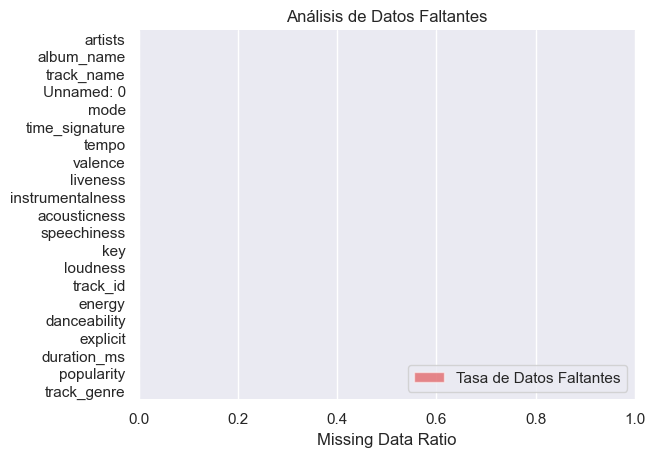

In [5]:
missing_ratios = spotify_df.apply(lambda x: 1 - (x.count() / x.size))
missing_ratios = missing_ratios.sort_values(ascending=False)

sns.set_theme()

sns.set_color_codes("pastel")
sns.barplot(x=missing_ratios, y=missing_ratios.index,
            label="Tasa de Datos Faltantes", color="red", alpha=0.5)

plt.legend(ncol=1, loc="lower right", frameon=True)
plt.xlim(0, 1)
plt.xlabel("Missing Data Ratio")
plt.ylabel("")
plt.title("Análisis de Datos Faltantes")
sns.despine(left=True, bottom=True)
plt.show()

 Esto sugiere que nuestros datos están completos y no requerirán un tratamiento especial para manejar valores faltantes.

**Número de Duplicados en el DataFrame**

In [6]:
spotify_df.duplicated().sum()

0

A pesar de la ausencia de datos duplicados, no se puede asegurar que no existan canciones repetidas en el conjunto de datos.

**track_id**

In [7]:
spotify_df.duplicated(subset=['track_id']).sum()

24259

Se han identificado 24,259 canciones con el mismo `track_id`,  y han sido eliminadas del conjunto de datos.

In [8]:
spotify_df = spotify_df.drop_duplicates(subset="track_id", keep='first', inplace=False)
spotify_df.shape

(89741, 21)

**track_name**

In [9]:
spotify_df.duplicated(subset=['track_name']).sum()

16132

Además, hemos identificado un total de 16,132 canciones con el mismo nombre en nuestro conjunto de datos. Esto es una observación común, ya que diferentes artistas pueden tener canciones con nombres similares. Para comprender mejor esta situación y determinar si es necesario tomar alguna acción, realizaremos un análisis adicional para agrupar estas canciones por nombre y verificar cuántas de ellas son interpretadas por artistas diferentes. 

In [10]:
spotify_df.loc[:, 'track_name'] = spotify_df['track_name'].str.lower()
grouped_df = spotify_df.groupby(['track_name', 'artists']).size().reset_index(name='count')
grouped_df.sort_values(by = 'count', ascending= False).shape

(81206, 3)

Después de agrupar canciones por nombre de pista y artistas, encontramos 81,206 combinaciones únicas.

**track_genre**

In [25]:
spotify_df['track_genre'].nunique()

113

Hay un total de 113 géneros musicales únicos en nuestro conjunto de datos, lo que sugiere que podríamos considerar realizar agrupaciones en esta variable para facilitar el análisis

**duration_ms**

<Axes: >

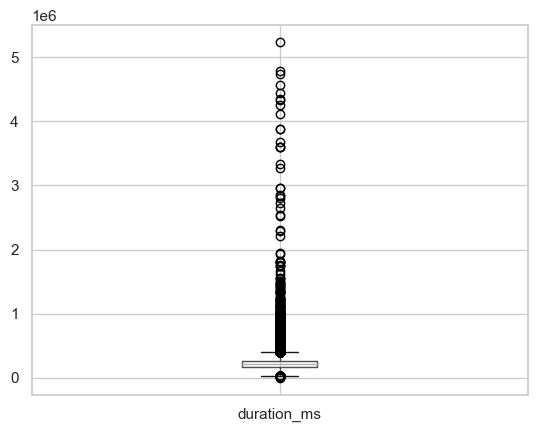

In [31]:
spotify_df.boxplot(column='duration_ms')

Revela bastantes valores atípicos en la duración de las canciones, con la consideración de que la duración está en milisegundos (ms). Para una representación más intuitiva, se realizara la transformación de esta medida a segundos (s).

**artists**

In [11]:
spotify_df['artists'].nunique()

31437

In [40]:
spotify_df[['track_name','artists']].sample(5)

,track_name,artists
16078,"brandenburg concerto no. 3 in g, bwv 1048: 1. ...",Johann Sebastian Bach;Berliner Philharmoniker;...
59300,beyond,Saeed Dehghan;Rez
20065,skate,Bruno Mars;Anderson .Paak;Silk Sonic
31310,will it ever feel the same?,Bazzi
61674,party maker,Perfume


Hay un total de 31,437 artistas únicos en nuestro conjunto de datos. Sin embargo, es importante destacar que algunas canciones cuentan con múltiples artistas. En este análisis, se opta por conservar solo el primer artista listado en cada canción como representación de la autoría principal.

**Resumen Estadístico**

In [27]:
spotify_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,89741.0,53479.144148,33409.981502,0.000,23767.0000,50681.000000,80618.0000,113999.000
popularity,89741.0,33.198438,20.580824,0.000,19.0000,33.000000,49.0000,100.000
duration_ms,89741.0,229141.812182,112947.741190,0.000,173040.0000,213293.000000,264293.0000,5237295.000
danceability,89741.0,0.562166,0.176691,0.000,0.4500,0.576000,0.6920,0.985
energy,89741.0,0.634458,0.256605,0.000,0.4570,0.676000,0.8530,1.000
key,89741.0,5.283549,3.559897,0.000,2.0000,5.000000,8.0000,11.000
loudness,89741.0,-8.499004,5.221490,-49.531,-10.3220,-7.185000,-5.1080,4.532
mode,89741.0,0.636966,0.480877,0.000,0.0000,1.000000,1.0000,1.000
speechiness,89741.0,0.087442,0.113277,0.000,0.0360,0.048900,0.0859,0.965
acousticness,89741.0,0.328289,0.338321,0.000,0.0171,0.188000,0.6250,0.996


Una observación destacada es que al menos una canción tiene una duración de 0.

In [29]:
spotify_df[spotify_df['duration_ms'] == 0]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop
